In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.dropna(inplace=True)# values where missing from the total_bedrooms column so to match all columns so that they can be fair (drop all NA values), inplace=true replaces and saves new data into the data variable 

one feature that is too low/too high of samples, augment these to produce normal distribution 


needs to be binary hot one encoded not true and false 

In [4]:
#convert ocean proximity column to numerical features using one hot enconding and joining to train data, get rid of original ocean proximity column
#train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [5]:
# Convert 'ocean_proximity' column to one-hot encoded columns
train_data_encoded = pd.get_dummies(data['ocean_proximity'])

# Join the one-hot encoded columns to the original dataframe and drop the original 'ocean_proximity' column
train_data = data.join(train_data_encoded).drop(['ocean_proximity'], axis=1)


In [6]:
#Splitting of data
from sklearn.model_selection import train_test_split

X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']


In [7]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #try 0.15

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [9]:
print("First 5 rows of X_train:")
print(X_train.head())

print("\nFirst 5 rows of y_train:")
print(y_train.head())

First 5 rows of X_train:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0       4412.0           924.0   
2057     -119.63     36.64                33.0       1036.0           181.0   
6453     -118.06     34.12                25.0       3891.0           848.0   
4619     -118.31     34.07                28.0       2362.0           949.0   
15266    -117.27     33.04                27.0       1839.0           392.0   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
17727      2698.0       891.0         4.7027       True   False   False   
2057        620.0       174.0         3.4107      False    True   False   
6453       1848.0       759.0         3.6639      False    True   False   
4619       2759.0       894.0         2.2364       True   False   False   
15266      1302.0       404.0         3.5500      False   False   False   

       NEAR BAY  NEAR OCEAN  
17727     False    

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

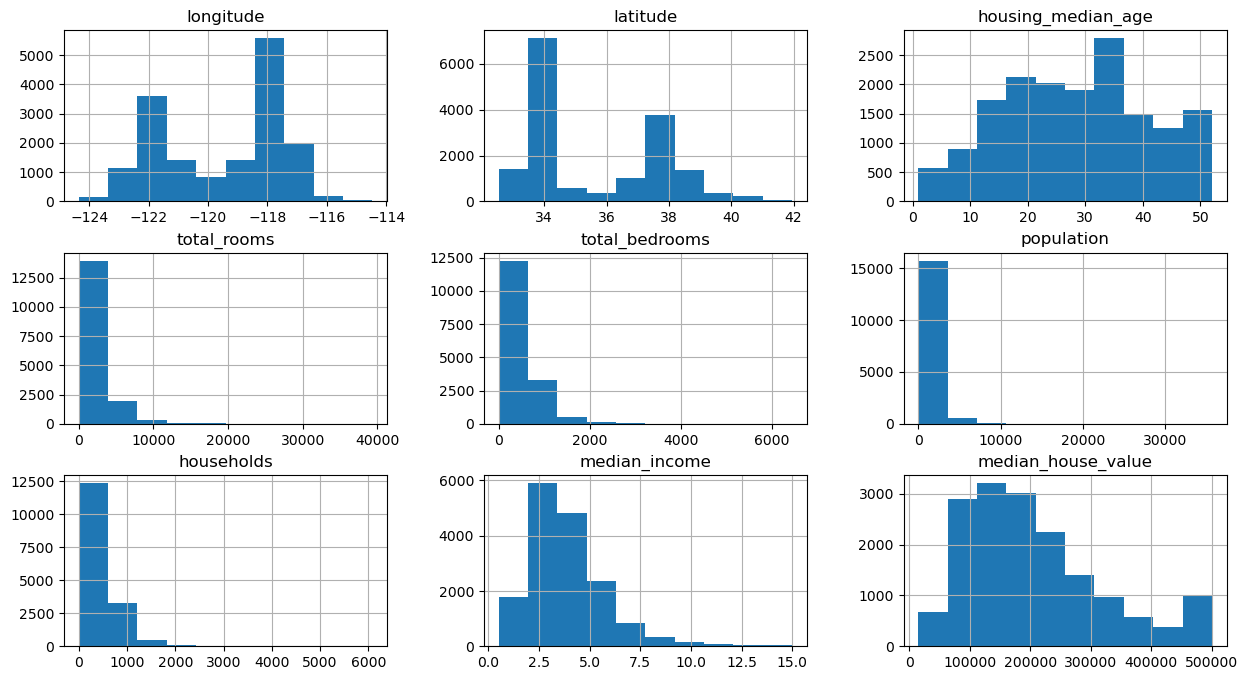

In [10]:
#join the X traing data and Y training data to analyse some basic correlations

train_data = X_train.join(y_train)
#line below produces histogram of values 
train_data.hist(figsize=(15, 8)) 


In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,True,False,False,False,False,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,False,True,False,False,False,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,False,True,False,False,False,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,True,False,False,False,False,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,False,False,False,False,True,214600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,True,False,False,False,False,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,True,False,False,False,False,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,True,False,False,False,False,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,False,False,False,True,False,231200.0


<Axes: >

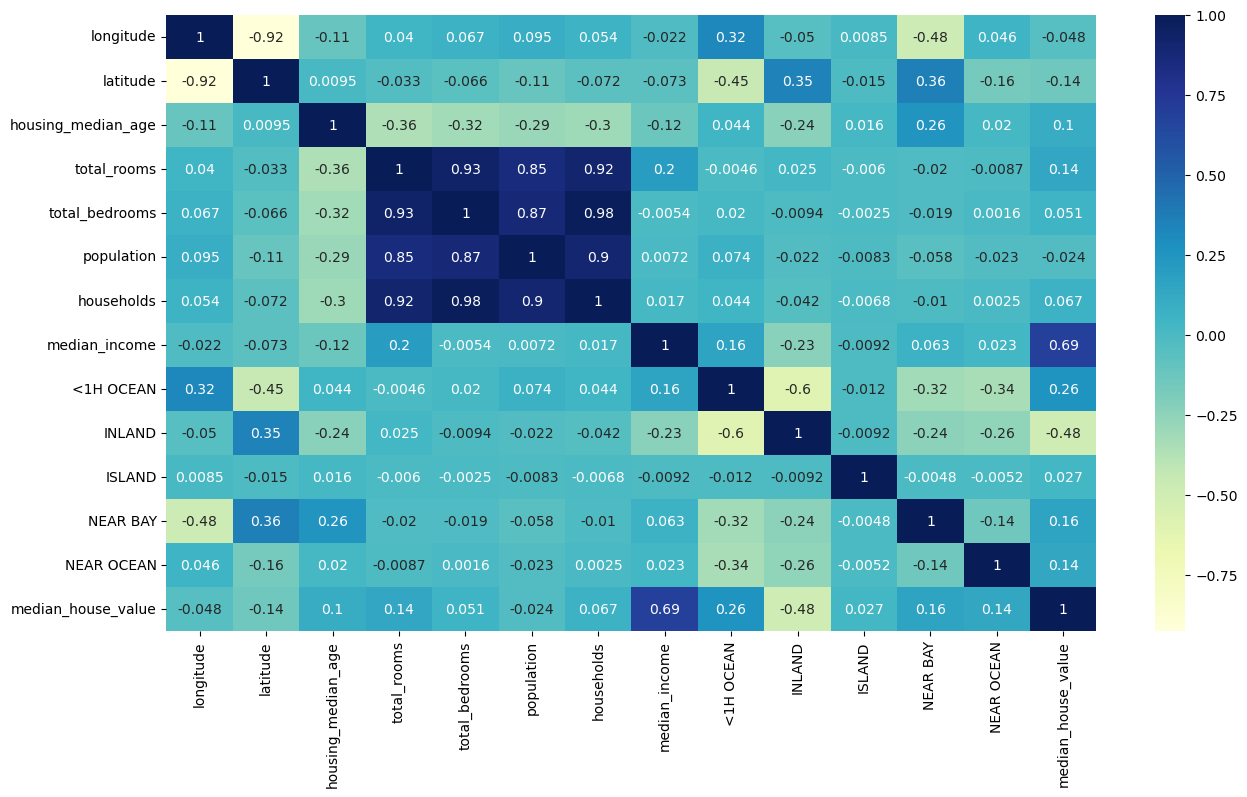

In [12]:
#data exploration: checking for correlation within the data using seaborn - heatmaps with colours yellow green and blue  - 
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#correlation shows that inland median price is lower than the rest so ocean proximity column provides useful info

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

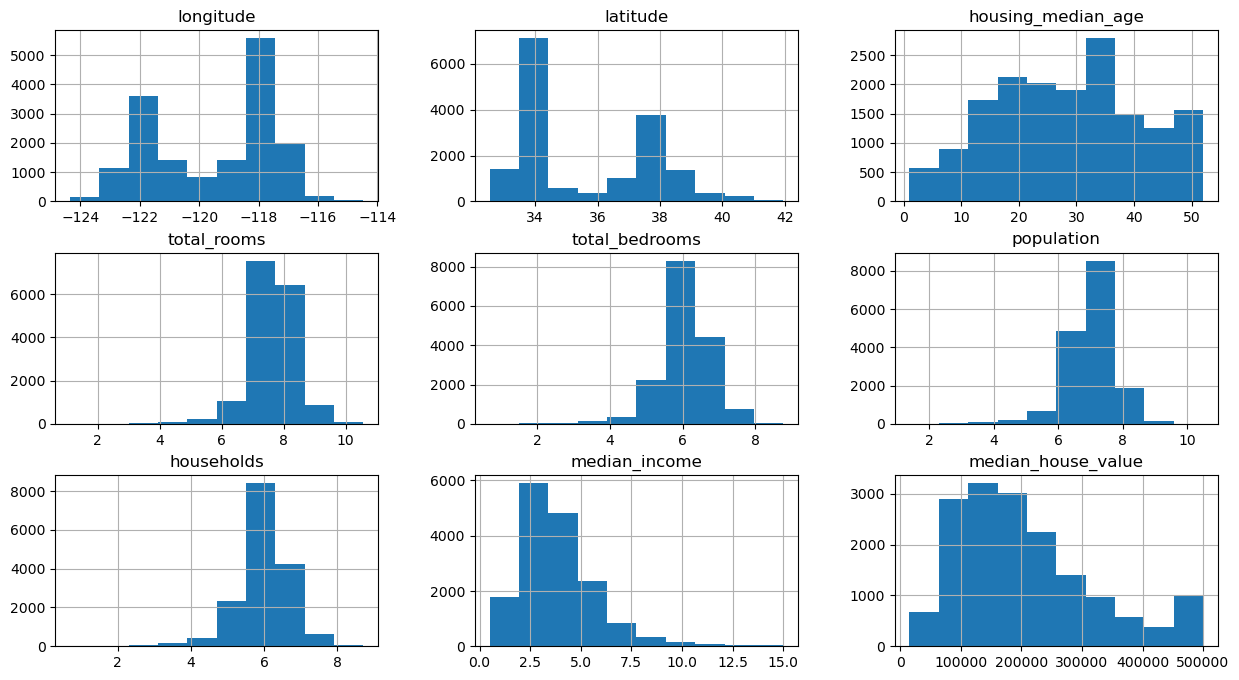

In [13]:
#data preprocessing - data is skewed (mostly right skewed, its not exactly a nice bell curve, +1 to avoid 0 values, once data is trained, used hist to view in histogram )
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)
train_data.hist(figsize=(15, 8)) 

<Axes: xlabel='latitude', ylabel='longitude'>

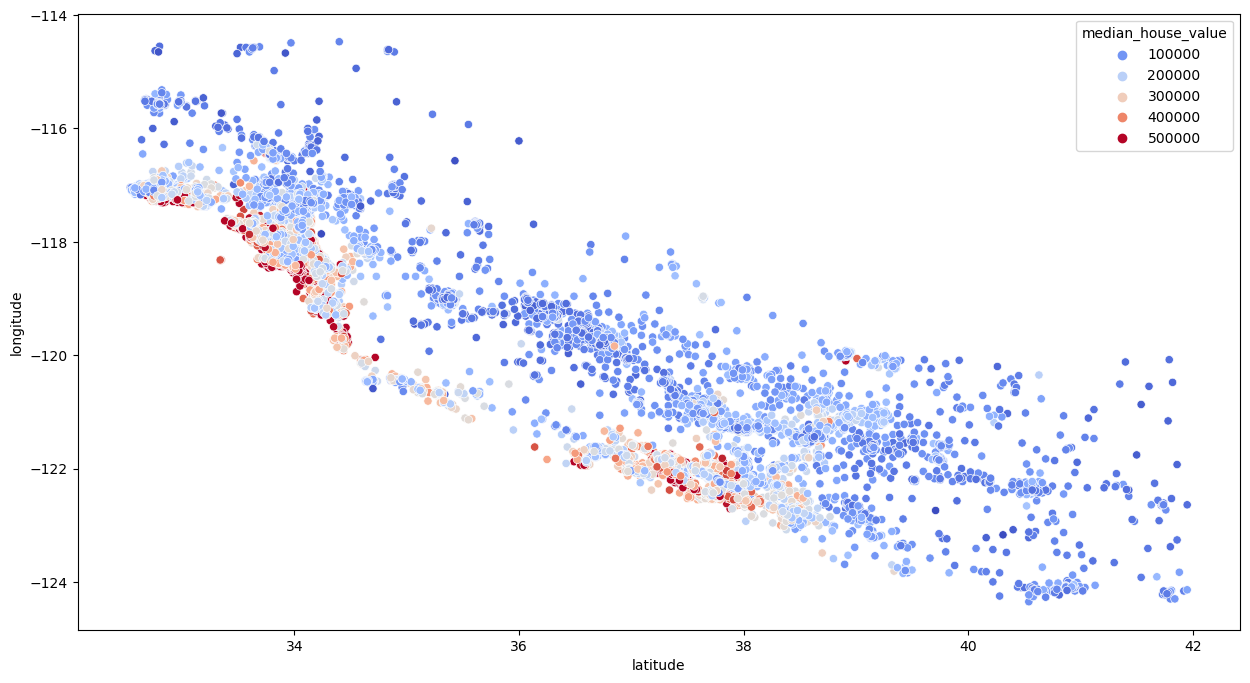

In [14]:
#display data based on median house value in accordance to its ocean proximity. red being more expensive closest to the ocean as opposed to blue being cheaper towards inland
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue='median_house_value', palette='coolwarm')

with our new features we can see that there is a clear correlation e.g. the bedroom_ratio has a negative correlation with the median house value per block whereas the households input variable doesn't really signify much in comparrison to the household rooms

<Axes: >

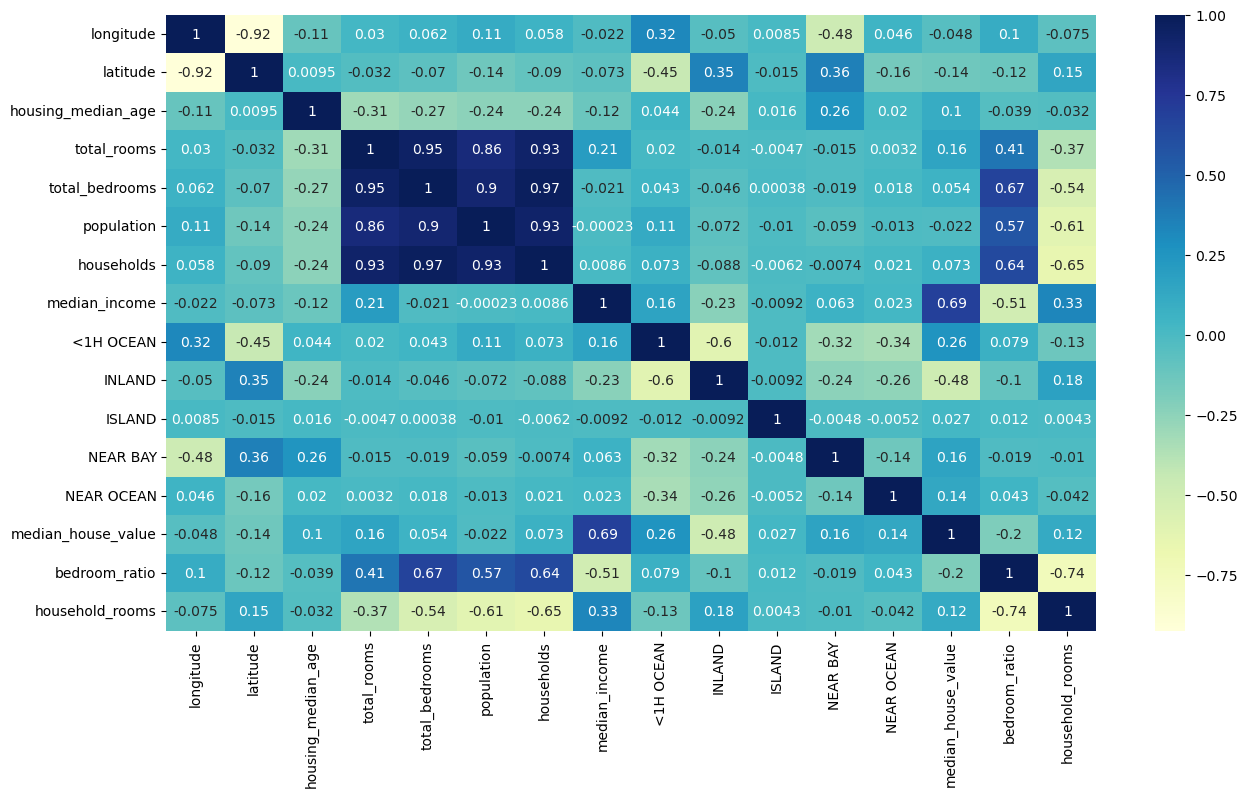

In [15]:
#feature engineering: total rooms & bedrooms - how many of those rooms are bedrooms: bedroom ratio
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
#add another feature that shows the rooms within households within a blockl of households (a block that holds many households etc)
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#with the new features we can see

features need to have the same range - data needs to be normalised and augmentated - better to do extra processing for lonitiude and latitude as its location orientated 

In [16]:
X_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,False,False,False,True,False


In [17]:
# training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# split the data into features (X) and target (y)
X = train_data.drop('median_house_value', axis=1)
y = train_data['median_house_value']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# make predictions on the testing data
y_pred = forest.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred) / 10000000000
print("Mean Squared Error:", mse)

# calculate the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse) 

# calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error: 0.23025166866562066
Root Mean Squared Error: 0.47984546331670225
R2 Score: 0.823155939051417


In [18]:
#training linear regression model using the scaled data:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the Linear Regression model
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = linear_reg.predict(X_test)

# Calculate the R2 score for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R2 Score:", r2_linear)

# Calculate the MSE for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

# Calculate the RMSE for Linear Regression
rmse_linear = np.sqrt(mse_linear)
print("Linear Regression Root Mean Squared Error:", rmse_linear)


Linear Regression R2 Score: 0.6747973526111832
Linear Regression Mean Squared Error: 4234151365.565127
Linear Regression Root Mean Squared Error: 65070.357041936746
